In [1]:
# подготовимся к импорту API который находится в родительской папке относительно этой тетрадки
import sys
import os
path = os.getcwd()
print(path)
sys.path.insert(0, path)
# импортируем api
import unifloc_vba_python_api.python_api as python_api 
# готовим объект с доступом к надстройке. При этом надстройка откроется и запустится excel 
UniflocVBA = python_api.API("UniflocVBA_7.xlam")
print("import excel with unifloc vba done. version " + UniflocVBA.unf_version())

C:\Users\Sevrn\Desktop\C#\unifloc_net\test
import excel with unifloc vba done. version 7.25


In [1]:
import sys
import clr
import DLLs
from ctypes import *
import os
path = os.path.abspath('..')
cur_path = path + '\\u7_excel\\bin\\Debug'

sys.path.append(f'{cur_path}')
clr.AddReference('alglibnet2')
clr.AddReference('UnfClassLibrary')
clr.AddReference('u7_excel')

import UnfClassLibrary
import u7_excel
u7_excel

<module 'u7_excel'>

In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pylab as plt

In [2]:
help(u7_excel)

Help on ModuleObject:

u7_excel
    Namespace containing types from the following assemblies:
    
    - u7_excel, Version=1.0.0.0, Culture=neutral, PublicKeyToken=null



In [4]:
## Физико-химические свойства флюида PVT
gamma_gas_ = 0.8 # удельная плотность газа, по воздуху;
gamma_oil_ = 0.9 # удельная плотность нефти, по воде;
gamma_wat_ = 1 # удельная плотность воды, по воде;
Rsb_ = 80 # газосодержание при давлении насыщения, м3/м3;
Rp_  = 80 # замерной газовый фактор, м3/м3;
Pb_ = 120 # давление насыщения при температуре пласта, атм;
Tres_ = 100 # пластовая температура, С;
Bob_ = 1.2 # объемный коэффициент нефти, м3/м3;
muob_ = 1 # вязкость нефти при давлении насыщения, сП;
## Параметры потока флюида
Q_ = 3 # дебит жидкости на поверхности, м3/сут;
fw_ = 10 # объемная обводненность, %;
## Данные по ЭЦН
Q_ESP_ = 8 # номинальный дебит, м3/сут;
Head_ESP_ = 2000 # номинальный напор системы УЭЦН, м;
Freq_ = 50 # частота вращения ЭЦН, Гц;
PumpID_ = UniflocVBA.ESP_id_by_rate(Q_ESP_) # идентификатор типового насоса;
print("ЭЦН ID - "+ str(PumpID_))
PumpID_dll = u7_excel.u7_Excel_functions_ESP.ESP_id_by_rate(Q_ESP_) # идентификатор типового насоса;
print("ЭЦН ID vb.net - "+ str(PumpID_dll))
ESP_name = UniflocVBA.ESP_name(PumpID_) #  название ЭЦН по номеру;
print("ЭЦН имя - "+ ESP_name)
ESP_name_dll = u7_excel.u7_Excel_functions_ESP.ESP_name(PumpID_dll) #  название ЭЦН по номеру;
print("ЭЦН имя vb.net - "+ ESP_name_dll)
Qmax_ = UniflocVBA.ESP_rate_max_sm3day(Freq_, PumpID_) # максимальный дебит ЭЦН для заданной частоты при номинаьной кривой РНХ;
print("ЭЦН Qmax - "+ str(Qmax_))
Qmax_dll = u7_excel.u7_Excel_functions_ESP.ESP_rate_max_sm3day(Freq_, PumpID_dll) # максимальный дебит ЭЦН для заданной частоты при номинаьной кривой РНХ;
print("ЭЦН Qmax vb.net - "+ str(Qmax_dll))
NumStage_ = round(Head_ESP_/UniflocVBA.ESP_head_m(Q_ESP_, 1, pump_id=PumpID_)) # количество ступеней;
print("Ступени - "+ str(NumStage_))
NumStage_dll = round(Head_ESP_/u7_excel.u7_Excel_functions_ESP.ESP_head_m(Q_ESP_, 1, pump_id=PumpID_dll)) # количество ступеней;
print("Ступени  vb.net - "+ str(NumStage_dll))
KsepGasSep_ = 80 # коэффициент сепарации газосепаратора УЭЦН;
PKsep = 80 # давление сепарации, атм;
TKsep = 80 # температура сепарации, С;
mu = 1 # вязкость жидкости, сП;
## Настройка графика
N_ = 20
## Данные по ЭЦН
Pintake_ = 45 # давление на приеме насоса, амт;
Tintake_ = 80 # температура на примеме насоса, С;
Pdis_ = 150 # давление на выкиде насоса, амт;
Tdis_ = 80 # температура на выкиде насоса, С;
gas_degr_type_ = 1 # тип насоса по работе с газом:
# 0 - нет коррекции;
# 1 - стандартный ЭЦН (предел 25%);
# 2 - ЭЦЕН с газостабилизирующим модулем (предел 50%)
# и т.д. см. мануал;
PVTcorr = 0 # номер набора корреляций (0 - Standing и т.д. см. мануал)
gas_only = False
PVT_str_ = UniflocVBA.PVT_encode_string(gamma_gas_, gamma_oil_, gamma_wat_, Rsb_, Rp_, Pb_, Tres_, Bob_, muob_, PVTcorr, KsepGasSep_, PKsep, TKsep, gas_only)
pvt_str = u7_excel.u7_Excel_function_servise.PVT_encode_string(gamma_gas_, gamma_oil_, gamma_wat_, Rsb_, Rp_, Pb_, Tres_, Bob_, muob_, PVTcorr, KsepGasSep_, PKsep, TKsep, gas_only)

ЭЦН ID - 738
ЭЦН ID vb.net - 738
ЭЦН имя - ЭЦН5-15
ЭЦН имя vb.net - ЭЦН5-15
ЭЦН Qmax - 33.0
ЭЦН Qmax vb.net - 33.0
Ступени - 304
Ступени  vb.net - 304


In [5]:
calc_along_flow = 1 # направление расчета;
dN = 10 # количество точек для вывода значений по ступеням;
n_stage, p_list, t_list, gas_fraction_list, qmix_list = [], [], [], [], []
p_atma = UniflocVBA.ESP_p_atma(Q_, fw_, Pintake_, NumStage_, Freq_, PumpID_, PVT_str_, Tintake_, Tdis_)
n_stage_dll, p_list_dll, t_list_dll, gas_fraction_list_dll, qmix_list_dll = [], [], [], [], []
p_atma_dll = u7_excel.u7_Excel_functions_ESP.ESP_p_atma(Q_, fw_, Pintake_, NumStage_, Freq_, PumpID_dll, pvt_str, Tintake_, Tdis_)

for i in range(N_):
    n_stage.append(p_atma[3+i][1])
    p_list.append(p_atma[3+i][3])
    t_list.append(p_atma[3+i][4])
    gas_fraction_list.append(p_atma[3+i][5])
    qmix_list.append(p_atma[3+i][6])
    n_stage_dll.append(p_atma[3+i][1])
    p_list_dll.append(p_atma[3+i][3])
    t_list_dll.append(p_atma[3+i][4])
    gas_fraction_list_dll.append(p_atma[3+i][5])
    qmix_list_dll.append(p_atma[3+i][6])

In [15]:

num_stages = 100
freq_hz = 60
pump_id = 750
mu = 0.44
Q_0 = 10
Q_n = 230
dQ = 10 
Q_sm3day = np.arange(Q_0, Q_n, dQ) # дебит жидкости;
h_esp, h_esp_dll = [], []
for q in Q_sm3day:
    h = UniflocVBA.ESP_head_m(q, num_stages, freq_hz, pump_id, mu)
    h_esp.append(h)
    h_dll = u7_excel.u7_Excel_functions_ESP.ESP_head_m(q, num_stages, freq_hz, pump_id, mu)
    h_esp_dll.append(h_dll)


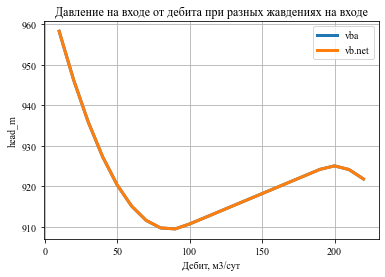

In [16]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'
ys = [ h_esp, h_esp_dll]

for j in range(2):
        plt.grid(True)
        plt.title('Давление на входе от дебита при разных жавдениях на входе', color='black', family='fantasy')
        plt.ylabel('head_m', color='black', family='fantasy')
        plt.xlabel('Дебит, м3/сут', color='black', family='fantasy')
        plt.plot(Q_sm3day, ys[j], linewidth=3)
plt.legend(('vba', 'vb.net')) 
plt.show()

In [6]:
num_stages = 100
freq_hz = 60
pump_id = 750
mu = 0.44
Q_0 = 10
Q_n = 230
dQ = 10 
Q_sm3day = np.arange(Q_0, Q_n, dQ) # дебит жидкости;
power_esp, power_esp_dll = [], []
for q in Q_sm3day:
    h = UniflocVBA.ESP_power_W(q, num_stages, freq_hz, pump_id, mu)
    power_esp.append(h)
    h_dll = u7_excel.u7_Excel_functions_ESP.ESP_power_W(q, num_stages, freq_hz, pump_id, mu)
    power_esp_dll.append(h_dll)

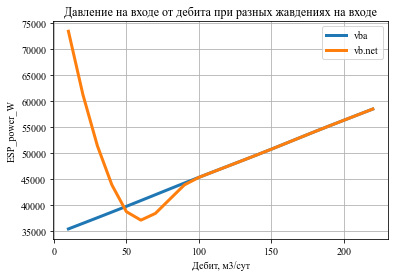

In [7]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'
ys = [ power_esp, power_esp_dll]

for j in range(2):
        plt.grid(True)
        plt.title('Давление на входе от дебита при разных жавдениях на входе', color='black', family='fantasy')
        plt.ylabel('ESP_power_W', color='black', family='fantasy')
        plt.xlabel('Дебит, м3/сут', color='black', family='fantasy')
        plt.plot(Q_sm3day, ys[j], linewidth=3)
plt.legend(('vba', 'vb.net')) 
plt.show()